In [203]:
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [207]:
df = pd.read_csv('/Users/jbpothin/Desktop/DATA/Databases/AirPassengers.csv')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [209]:
df['Month'] = pd.to_datetime(df['Month'])
df

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


# Testing and observing stationnarity

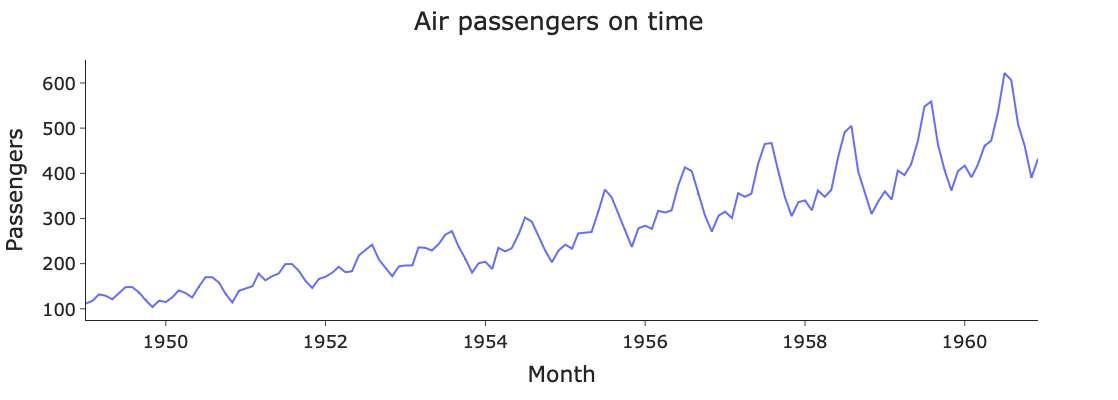

In [212]:
def plotting(title,data,x,y,xlabel,ylabel):
    fig=px.line(data,x=data[x],y=data[y],labels={x:xlabel,y:ylabel})

    fig.update_layout(template='simple_white',font=dict(size=18),title_text=title,width=650,title_x=0.5,height=400)

    fig.show()

plotting('Air passengers on time',df,'Month','#Passengers','Month','Passengers')

In [214]:
def adf_test(series):
    test_results=adfuller(series)
    P_value =  test_results[1]
    if P_value < 0.05:
        print('Data set is Stationnary')
    else:
        print('Dataset is not stationnary')
    print('Adf Statistics : ',test_results[0])
    print('P_Value : ',test_results[1])
    print('Critical Values : ')
    
    for thres, adf_stat in test_results[4].items():
        print('\t%s: %.2f' % (thres,adf_stat))
        
adf_test(df['#Passengers'][1:])

Dataset is not stationnary
Adf Statistics :  0.7923399959692567
P_Value :  0.991511509628866
Critical Values : 
	1%: -3.48
	5%: -2.88
	10%: -2.58


Following Augmented Dickey Fuller test and our observations, the series is not stationnary because of its clear trrend and variance.

# Differencing

# d(t) = y(t) - y(t-1) 

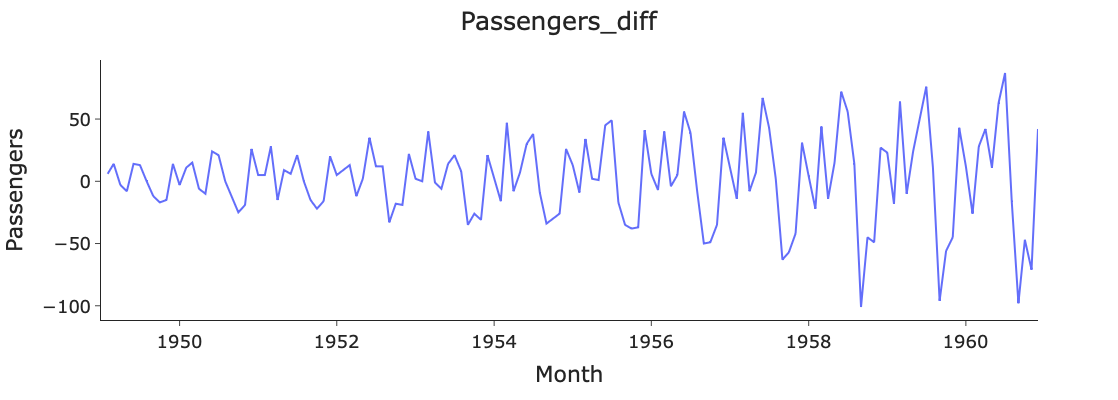

In [219]:
df['Passengers_diff']=df['#Passengers'].diff()

plotting('Passengers_diff',df,'Month','Passengers_diff','Month','Passengers')

With .diff(), the series has now its mean stabilized, removing its trend. We can still observe its variance, we can though test
its stationnarity with ADFuller test again, before applying a loarithm or boxcox transformation.

In [222]:
def adf_test(series):
    test_results=adfuller(series)
    P_value =  test_results[1]
    if P_value < 0.05:
        print('Data set is Stationnary')
    else:
        print('Dataset is not stationnary')
    print('Adf Statistics : ',test_results[0])
    print('P_Value : ',test_results[1])
    print('Critical Values : ')
    
    for thres, adf_stat in test_results[4].items():
        print('\t%s: %.2f' % (thres,adf_stat))
        
adf_test(df['Passengers_diff'][1:])

Dataset is not stationnary
Adf Statistics :  -2.829266824169981
P_Value :  0.05421329028382793
Critical Values : 
	1%: -3.48
	5%: -2.88
	10%: -2.58


We changed Adf stat from 0.7923399959692567 to -2.829266824169981 and from P-value 0.991511509628866 to 0.05421329028382793
We are close of getting a stationnary series at 5% but H0 null hypothesis is accepted for this test, with its less than 95% of confidence. Then we should work on the variance.

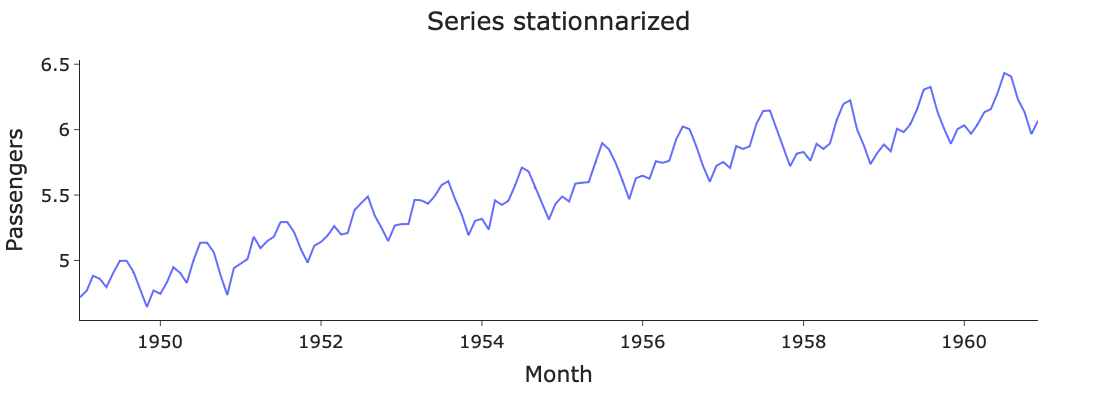

In [225]:
df['passengers_log']=np.log(df['#Passengers'])


plotting('Series stationnarized',df,'Month','passengers_log','Month','Passengers')

We can see above the series with a removed variance, now let's combine it with diff() to obtain the variance and the trend removed.

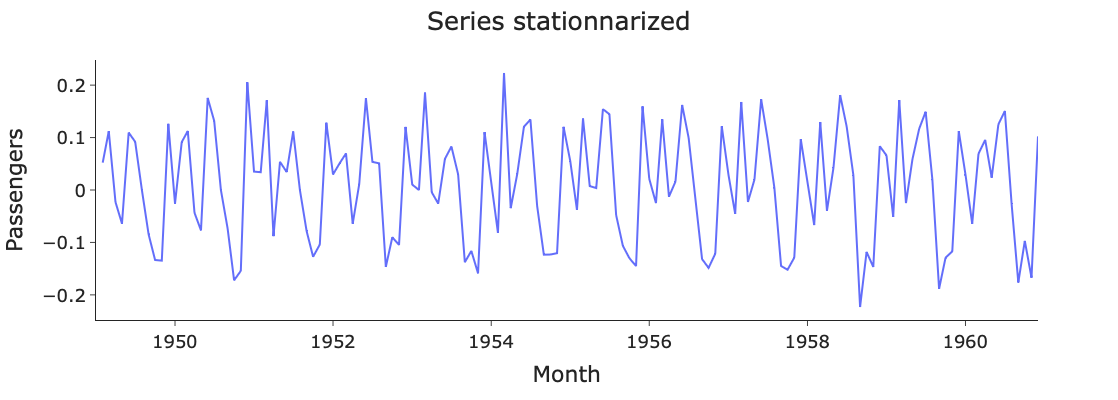

In [227]:
df['passengers_stat']=df['passengers_log'].diff()

plotting('Series stationnarized',df,'Month','passengers_stat','Month','Passengers')

In [229]:
def adf_test(series):
    test_results=adfuller(series)
    P_value =  test_results[1]
    if P_value < 0.05:
        print('Data set is Stationnary')
    else:
        print('Dataset is not stationnary')
    print('Adf Statistics : ',test_results[0])
    print('P_Value : ',test_results[1])
    print('Critical Values : ')
    
    for thres, adf_stat in test_results[4].items():
        print('\t%s: %.2f' % (thres,adf_stat))
        
adf_test(df['passengers_stat'][1:])

Dataset is not stationnary
Adf Statistics :  -2.7171305983881355
P_Value :  0.07112054815085828
Critical Values : 
	1%: -3.48
	5%: -2.88
	10%: -2.58


The time series has the null hypothesis rejected at 10%, but rejected at 5%. So we can say that the time series is
Stationnary with a level of 90% of confidence.